In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [10]:
data = pd.read_csv('credit_data.csv')

In [14]:
data

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0


In [11]:
print(data.head())
print(data.info())
print(data.describe())

   clientid       income        age         loan  default
0         1  66155.92510  59.017015  8106.532131        0
1         2  34415.15397  48.117153  6564.745018        0
2         3  57317.17006  63.108049  8020.953296        0
3         4  42709.53420  45.751972  6103.642260        0
4         5  66952.68885  18.584336  8770.099235        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB
None
          clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.14150

In [12]:
print(data.isnull().sum())

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64


In [15]:
data = data.dropna()

In [17]:
print(data.isnull().sum())

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64


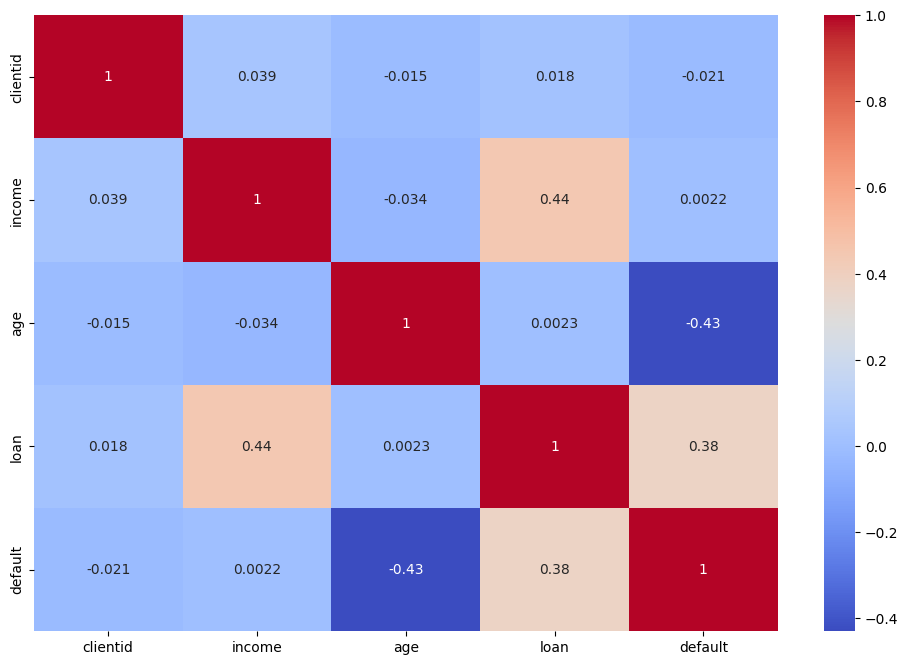

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
X = data[['age', 'income', 'loan']]  # Replace with relevant features
y = data['default']  # Replace with target variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       509
           1       0.83      0.70      0.76        91

    accuracy                           0.93       600
   macro avg       0.89      0.84      0.86       600
weighted avg       0.93      0.93      0.93       600



In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.9833333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       509
           1       0.98      0.91      0.94        91

    accuracy                           0.98       600
   macro avg       0.98      0.95      0.97       600
weighted avg       0.98      0.98      0.98       600



In [31]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy:  0.9783333333333334
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       509
           1       0.94      0.91      0.93        91

    accuracy                           0.98       600
   macro avg       0.96      0.95      0.96       600
weighted avg       0.98      0.98      0.98       600



In [32]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy: ", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVC Accuracy:  0.975
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       509
           1       0.93      0.90      0.92        91

    accuracy                           0.97       600
   macro avg       0.96      0.94      0.95       600
weighted avg       0.97      0.97      0.97       600



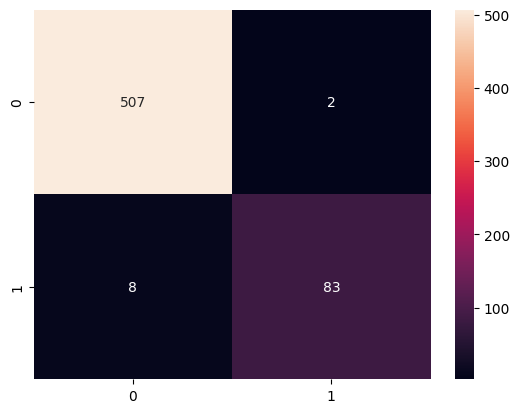

In [33]:
best_model = rf  
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [34]:
scores = cross_val_score(best_model, X, y, cv=10)
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.985      0.985      0.99       1.         0.99       0.99
 0.995      0.9798995  0.99497487 0.98492462]
Average Cross-Validation Score: 0.9894798994974874


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 10, 'n_estimators': 200}


In [36]:
import joblib
joblib.dump(best_model, 'credit_scoring_model.pkl')

['credit_scoring_model.pkl']